In [2]:
# call module master_df

from master_df import setup


df_master = setup()

# df_master.fillna(0, inplace=True)

In [3]:
df_master.head(1)

,lfnr,lieferant,artnr,beschreibung,index,basispreis,basispr_summe,gesamt_lager,ltz_vk_ges,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,75.36,0.00,0.00,2018-11-07 00:00:00,0.00,0,0.00,2018-11-07 00:00:00,0.00,2017-08-08 00:00:00,0.00,2016-04-29 00:00:00,0.00,2017-12-14 00:00:00,0.00,0,0.00,2017-08-31 00:00:00,0.00,0,0.00,2014-03-26 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [4]:
# other settings
import pandas as pd
pd.options.display.max_columns = 100

## Build Frameworks for MVP's

1. the current spare parts inventory of a specific subsidiary or across all subsidiaries
2. the inventory for one, several or all spare part product(s)
3. which supplier a product was obtained from
4. the product's description
5. the total number of products which are in stock at a specific subsidiary or across all subsidiaries
6. the value of products of a specific subsidiary or across all subsidiaries

In [5]:
# 1. The current spare parts inventory of a specific subsidiary or across all subsidiaries (all subsidies enter "gesamt" )

specific_subsidy = input('Please enter subsidy or "gesamt":')  # Enter respective subsidiary
specific_subsidy = f'{specific_subsidy}_lager'
specific_subsidy_inventory = df_master[['artnr', 'beschreibung', specific_subsidy]]
grouped_inventory_data_subsidy = specific_subsidy_inventory.groupby(['artnr', 'beschreibung']).sum()
filtered_data = grouped_inventory_data_subsidy[grouped_inventory_data_subsidy[specific_subsidy] != 0]
filtered_data

KeyError: "['_lager'] not in index"

In [ ]:
# check data type of artnr
data_type = type(df_master.loc[0, 'artnr'])
print("Data type of the first row under 'artnr' column:", data_type)

Data type of the first row under 'artnr' column: <class 'str'>


In [ ]:
# check data type of artnr
df_master['artnr'].map(type)

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
366075    <class 'str'>
366076    <class 'str'>
366077    <class 'str'>
366078    <class 'str'>
366079    <class 'str'>
Name: artnr, Length: 366080, dtype: object

In [ ]:
# only show rows where value of column is greater than null 
df_gesamt_notnull = df_master[df_master['gesamt_lager'] > 0]
df_gesamt_notnull

,lfnr,lieferant,artnr,beschreibung,index,ltz_vk_ges,basispreis_lager,basispr_summe,basispreis_vk,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk
14,430,Eberspächer Abgas,08.693.60,"K SET CORSA A 1,2I 33KW",0,0,131.39,131.39,0.00,1.00,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
17,430,Eberspächer Abgas,08.683.73,"R CORSA A 1,3N/S/1,4",0,0,8.76,8.76,0.00,1.00,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20,430,Eberspächer Abgas,08.608.86,"N CORSA D 1,4L 66KW BJ 2006-",0,2021-08-04 00:00:00,92.11,92.11,0.00,1.00,1.00,2021-08-04 00:00:00,0.00,2017-07-10 00:00:00,0.00,2018-08-20 00:00:00,0.00,2017-11-07 00:00:00,0.00,2018-09-13 00:00:00,0.00,2016-08-11 00:00:00,0.00,0,0.00,2018-05-04 00:00:00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
21,430,Eberspächer Abgas,08.683.90,"B CORSA A 1,0S",0,2016-07-13 00:00:00,4.74,9.48,0.00,2.00,2.00,2016-07-13 00:00:00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24,430,Eberspächer Abgas,08.592.90,"B KADETT E 1,7D AB 1989",0,0,19.26,57.78,0.00,3.00,3.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357817,0,BOSCH,0986479E46,BREMSSCHEIBE,0,2023-05-31 00:00:00,37.44,898.56,0.00,24.00,12.00,2023-05-08 00:00:00,0.00,2023-05-31 00:00:00,2.00,2023-05-03 00:00:00,0.00,0,2.00,2022-08-23 00:00:00,0.00,2022-12-06 00:00:00,2.00,0,2.00,2021-12-08 00:00:00,4.00,2023-02-08 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
357818,17,BREMICKER,403E52,ZÜNDLEITUNG,0,2010-01-05 00:00:00,11.22,11.22,0.00,1.00,1.00,2010-01-05 00:00:00,0.00,2003-04-01 00:00:00,0.00,2005-04-26 00:00:00,0.00,0,0.00,2009-05-23 00:00:00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
357819,0,BOSCH,0986479E52,BREMSSCHEIBE,0,2023-05-31 00:00:00,43.84,526.08,0.00,12.00,2.00,2023-03-08 00:00:00,2.00,2023-04-19 00:00:00,0.00,2023-05-24 00:00:00,0.00,0,0.00,2023-05-31 00:00:00,0.00,2022-12-21 00:00:00,0.00,0,2.00,2022-05-11 00:00:00,2.00,2023-05-12 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
357820,0,BOSCH,0986479E78,BREMSSCHEIBE 1 STK!!,0,2023-05-15 00:00:00,99.17,793.36,0.00,8.00,2.00,2022-11-16 00:00:00,0.00,0,0.00,0,0.00,0,2.00,2023-05-15 00:00:00,2.00,2022-11-16 00:00:00,0.00,0,2.00,2022-11-17 00:00:00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# 2a. The inventory for one product, by summing up different subsidies stocks

specific_artnr = str(input('Please enter the article number: '))

matching_rows = df_master[df_master['artnr'] == specific_artnr]

if not matching_rows.empty:
    subsidiary_columns = ['wen_lager', 'rgb_lager', 'amb_lager', 'cha_lager', 'str_lager', 'pas_lager', 'lan_lager', 'müh_lager', 'ros_lager']
    total_stock = 0

    for column in subsidiary_columns:
        total_stock += matching_rows[column].sum()

    print("Total inventory for article", specific_artnr, "across subsidiaries:")
    print(total_stock)
else:
    print("No matching rows found for the specified article number.")


Total inventory for article 0986479E78 across subsidiaries:
8.0


In [ ]:
# 2b. The inventory for one product, by summing up gesamt_lager

specific_artnr = str(input('Please enter the article number: '))

matching_rows = df_master[df_master['artnr'] == specific_artnr]

if not matching_rows.empty:
    total_stock = 0

    for index, row in matching_rows.iterrows():
        total_stock += row['gesamt_lager']

    print("Total inventory for article", specific_artnr, "across subsidiaries:")
    print(total_stock)
else:
    print("No matching rows found for the specified article number.")


Total inventory for article 0986479E78 across subsidiaries:
8.0


In [ ]:
# 2c the inventory for several products
# example article numbers: 403E52, WM3489

article_numbers = input('Please enter the article numbers (separated by commas): ')
article_numbers = article_numbers.split(',')

for specific_artnr in article_numbers:
    specific_artnr = specific_artnr.strip()  # Remove any leading/trailing spaces
    matching_rows = df_master[df_master['artnr'] == specific_artnr]

    if not matching_rows.empty:
        subsidiary_columns = ['wen_lager', 'rgb_lager', 'amb_lager', 'cha_lager', 'str_lager', 'pas_lager', 'lan_lager', 'müh_lager', 'ros_lager']
        total_stock = 0

        for column in subsidiary_columns:
            total_stock += matching_rows[column].sum()

        print("Total inventory for article", specific_artnr, "across subsidiaries:")
        print(total_stock)
    else:
        print("No matching rows found for the specified article number:", specific_artnr)
    print()  # Add a newline for readability between different article numbers


Total inventory for article 403E52 across subsidiaries:
1.0

Total inventory for article WM3489 across subsidiaries:
1.0



In [ ]:
# 2c the inventory for several products
# example article numbers: 403E52, WM3489

article_numbers = input('Please enter the article numbers (separated by commas): ')
article_numbers = article_numbers.split(',')

for specific_artnr in article_numbers:
    specific_artnr = specific_artnr.strip()  # Remove any leading/trailing spaces
    matching_rows = df_master[df_master['artnr'] == specific_artnr]

    if not matching_rows.empty:
        subsidiary_columns = {'gesamt_lager': 'Gesamt', 'wen_lager': 'Wen', 'rgb_lager': 'RGB'}
        total_stock = {}

        for column, label in subsidiary_columns.items():
            total_stock[label] = matching_rows[column].sum()

        print("Total inventory for article", specific_artnr, "across subsidiaries:")
        for label, stock in total_stock.items():
            print(label, ":", stock)
    else:
        print("No matching rows found for the specified article number:", specific_artnr)
    print()  # Add a newline for readability between different article numbers


Total inventory for article 403E52 across subsidiaries:
Gesamt : 1.0
Wen : 1.0
RGB : 0.0

Total inventory for article WM3489 across subsidiaries:
Gesamt : 1.0
Wen : 0.0
RGB : 0.0



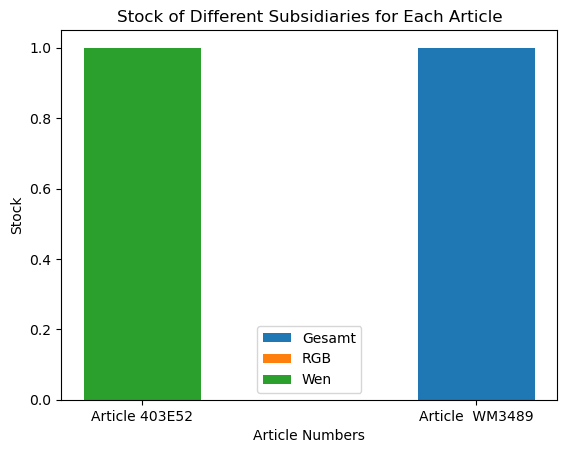

In [ ]:
import matplotlib.pyplot as plt

# 2c the inventory for several products
# example article numbers: 403E52, WM3489, 0986479E79
# Idea: swap x and y axis

article_numbers = input('Please enter the article numbers (separated by commas): ')
article_numbers = article_numbers.split(',')

gesamt_stock = []
rgb_stock = []
wen_stock = []

for specific_artnr in article_numbers:
    specific_artnr = specific_artnr.strip()  # Remove any leading/trailing spaces
    matching_rows = df_master[df_master['artnr'] == specific_artnr]

    if not matching_rows.empty:
        subsidiary_columns = {'gesamt_lager': 'Gesamt', 'wen_lager': 'Wen', 'rgb_lager': 'RGB'}
        total_stock = {}

        for column, label in subsidiary_columns.items():
            total_stock[label] = matching_rows[column].sum()

        gesamt_stock.append(total_stock['Gesamt'])
        rgb_stock.append(total_stock['RGB'])
        wen_stock.append(total_stock['Wen'])
    else:
        print("No matching rows found for the specified article number:", specific_artnr)
    print()  # Add a newline for readability between different article numbers

# Prepare the x-axis tick labels
x_labels = [f'Article {artnr}' for artnr in article_numbers]

# Set the width of the bars
bar_width = 0.35

# Create the figure and axes
fig, ax = plt.subplots()

# Create the bars
gesamt_bars = ax.bar(x_labels, gesamt_stock, width=bar_width, label='Gesamt')
rgb_bars = ax.bar(x_labels, rgb_stock, width=bar_width, label='RGB')
wen_bars = ax.bar(x_labels, wen_stock, width=bar_width, label='Wen')

# Set labels and title
ax.set_xlabel('Article Numbers')
ax.set_ylabel('Stock')
ax.set_title('Stock of Different Subsidiaries for Each Article')
ax.legend()

# Show the chart
plt.show()


In [ ]:
# use to verify that above multiple article number stock is correct

specific_artnr = str(input('Please enter the article number: '))

matching_rows = df_master[df_master['artnr'] == specific_artnr]

if not matching_rows.empty:
    print("Rows for article number", specific_artnr, ":")
    print(matching_rows)
else:
    print("No matching rows found for the specified article number:", specific_artnr)


Rows for article number 403E52 :
       lfnr  lieferant   artnr beschreibung index           ltz_vk_ges  \
357818   17  BREMICKER  403E52  ZÜNDLEITUNG     0  2010-01-05 00:00:00   

        basispreis_lager  basispr_summe  basispreis_vk  gesamt_lager  \
357818             11.22          11.22           0.00          1.00   

        wen_lager           ltz_vk_wen  rgb_lager           ltz_vk_rgb  \
357818       1.00  2010-01-05 00:00:00       0.00  2003-04-01 00:00:00   

        amb_lager           ltz_vk_amb  cha_lager ltz_vk_cha  str_lager  \
357818       0.00  2005-04-26 00:00:00       0.00          0       0.00   

                 ltz_vk_str  pas_lager ltz_vk_pas  lan_lager ltz_vk_lan  \
357818  2009-05-23 00:00:00       0.00          0       0.00          0   

        müh_lager ltz_vk_müh  ros_lager ltz_vk_ros  gesamt_vk  wen_vk  rgb_vk  \
357818       0.00          0       0.00          0       0.00    0.00    0.00   

        str_vk  pas_vk  amb_vk  cha_vk  lan_vk  müh_vk  ros

In [ ]:
# for No. 2 still missing ALL article numbers

In [ ]:
# 3. which supplier a product was obtained from
# still to be covered if article number got provided by several suppliers

specific_artnr = str(input('Please enter the article number: '))

matching_rows = df_master[df_master['artnr'] == specific_artnr]

if not matching_rows.empty:
    specific_article_supplier = matching_rows['lieferant'].iloc[0]

    print("Supplier for article", specific_artnr, ":")
    print(specific_article_supplier)
else:
    print("No matching rows found for the specified article number.")

Supplier for article 403E52 :
BREMICKER


In [ ]:
# 4. the product's description

specific_artnr = str(input('Please enter the article number: '))

matching_rows = df_master[df_master['artnr'] == specific_artnr]

if not matching_rows.empty:
    specific_article_beschr = matching_rows['beschreibung'].iloc[0]

    print("Description for article", specific_artnr, ":")
    print(specific_article_beschr)
else:
    print("No matching rows found for the specified article number.")

Description for article 403E52 :
ZÜNDLEITUNG


5. the total number of products which are in stock at a specific subsidiary or across all subsidiaries

**already covered by Max**

In [ ]:
# 6. the value of products of a specific subsidiary or across all subsidiaries

specific_subsidy = input('Please enter subsidy or "gesamt":')  # Enter respective subsidiary or gesamt for all subsidies
specific_subsidy = f'{specific_subsidy}_lager'

specific_subsidy_value = df_master[specific_subsidy] * df_master['basispreis']
total_value_specific_subsidy = specific_subsidy_value.sum()
total_value_specific_subsidy
print("The value of articles in subsidiary", specific_subsidy, "is:", total_value_specific_subsidy)

KeyError: 'basispreis'

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366080 entries, 0 to 366079
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   lfnr              366080 non-null  object 
 1   lieferant         366079 non-null  object 
 2   artnr             366080 non-null  object 
 3   beschreibung      366080 non-null  object 
 4   index             366080 non-null  object 
 5   ltz_vk_ges        366080 non-null  object 
 6   basispreis_lager  366080 non-null  float64
 7   basispr_summe     366080 non-null  float64
 8   basispreis_vk     366080 non-null  float64
 9   gesamt_lager      366080 non-null  float64
 10  wen_lager         366080 non-null  float64
 11  ltz_vk_wen        366080 non-null  object 
 12  rgb_lager         366080 non-null  float64
 13  ltz_vk_rgb        366080 non-null  object 
 14  amb_lager         366080 non-null  float64
 15  ltz_vk_amb        366080 non-null  object 
 16  cha_lager         36

## Inventory turnover based on sales values:
(No. of sales * basic price) /
(quantity inventory * basic price)

In [6]:
# create a new DataFrame with rows dropped if gesamt_lager is less than zero and gesamt_vk is less than zero
df_filtered = df_master[(df_master['gesamt_lager'] >= 0) & (df_master['gesamt_vk'] >= 0)].copy()

In [8]:
df_filtered.head(2)

,lfnr,lieferant,artnr,beschreibung,index,basispreis,basispr_summe,gesamt_lager,ltz_vk_ges,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,75.36,0.00,0.00,2018-11-07 00:00:00,0.00,0,0.00,2018-11-07 00:00:00,0.00,2017-08-08 00:00:00,0.00,2016-04-29 00:00:00,0.00,2017-12-14 00:00:00,0.00,0,0.00,2017-08-31 00:00:00,0.00,0,0.00,2014-03-26 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,93.63,0.00,0.00,2021-08-04 00:00:00,0.00,2021-08-04 00:00:00,0.00,2017-07-10 00:00:00,0.00,2021-04-26 00:00:00,0.00,2021-04-28 00:00:00,0.00,2018-09-13 00:00:00,0.00,2019-07-31 00:00:00,0.00,2016-06-24 00:00:00,0.00,0,0.00,2015-05-04 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
# create new colum total_sales_value, example subsidiary = wen
df_filtered['total_sales_value'] = df_filtered['gesamt_vk'] * df_filtered['basispreis']
df_filtered.head(2)

,lfnr,lieferant,artnr,beschreibung,index,basispreis,basispr_summe,gesamt_lager,ltz_vk_ges,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,total_sales_value
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,75.36,0.00,0.00,2018-11-07 00:00:00,0.00,0,0.00,2018-11-07 00:00:00,0.00,2017-08-08 00:00:00,0.00,2016-04-29 00:00:00,0.00,2017-12-14 00:00:00,0.00,0,0.00,2017-08-31 00:00:00,0.00,0,0.00,2014-03-26 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,93.63,0.00,0.00,2021-08-04 00:00:00,0.00,2021-08-04 00:00:00,0.00,2017-07-10 00:00:00,0.00,2021-04-26 00:00:00,0.00,2021-04-28 00:00:00,0.00,2018-09-13 00:00:00,0.00,2019-07-31 00:00:00,0.00,2016-06-24 00:00:00,0.00,0,0.00,2015-05-04 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
# adjusting column positions

column_order = ['lfnr', 'lieferant', 'artnr', 'beschreibung', 'index', 'basispreis', 'basispr_summe',
                'total_sales_value', 'gesamt_lager', 'ltz_vk_ges', 'wen_lager',
                'ltz_vk_wen', 'rgb_lager', 'ltz_vk_rgb', 'amb_lager', 'ltz_vk_amb', 'cha_lager',
                'ltz_vk_cha', 'str_lager', 'ltz_vk_str', 'pas_lager', 'ltz_vk_pas', 'lan_lager',
                'ltz_vk_lan', 'müh_lager', 'ltz_vk_müh', 'ros_lager', 'ltz_vk_ros', 'gesamt_vk',
                'wen_vk', 'rgb_vk', 'str_vk', 'pas_vk', 'amb_vk', 'cha_vk', 'lan_vk', 'müh_vk',
                'ros_vk']

df_filtered = df_filtered[column_order]

df_filtered.head(2)

,lfnr,lieferant,artnr,beschreibung,index,basispreis,basispr_summe,total_sales_value,gesamt_lager,ltz_vk_ges,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,75.36,0.00,0.00,0.00,2018-11-07 00:00:00,0.00,0,0.00,2018-11-07 00:00:00,0.00,2017-08-08 00:00:00,0.00,2016-04-29 00:00:00,0.00,2017-12-14 00:00:00,0.00,0,0.00,2017-08-31 00:00:00,0.00,0,0.00,2014-03-26 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,93.63,0.00,0.00,0.00,2021-08-04 00:00:00,0.00,2021-08-04 00:00:00,0.00,2017-07-10 00:00:00,0.00,2021-04-26 00:00:00,0.00,2021-04-28 00:00:00,0.00,2018-09-13 00:00:00,0.00,2019-07-31 00:00:00,0.00,2016-06-24 00:00:00,0.00,0,0.00,2015-05-04 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
import numpy as np

In [17]:
# iterate through rows and add u_häufigkeit per subsidiary

locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for x in locations.keys():
    u_haufigkeit_column = x + '_u_häufigkeit'
    numerator = df_filtered[x + '_vk'] * df_filtered['basispreis']
    denominator = df_filtered[x + '_lager'] * df_filtered['basispreis']
    mask = denominator != 0  # Check for non-zero denominators
    df_filtered[u_haufigkeit_column] = np.where(mask, numerator / denominator, 1)

In [13]:
df_filtered.head(2)

,lfnr,lieferant,artnr,beschreibung,index,basispreis,basispr_summe,total_sales_value,gesamt_lager,ltz_vk_ges,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_u_häufigkeit,wen_u_häufigkeit,rgb_u_häufigkeit,amb_u_häufigkeit,cha_u_häufigkeit,str_u_häufigkeit,pas_u_häufigkeit,lan_u_häufigkeit,müh_u_häufigkeit,ros_u_häufigkeit
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,75.36,0.00,0.00,0.00,2018-11-07 00:00:00,0.00,0,0.00,2018-11-07 00:00:00,0.00,2017-08-08 00:00:00,0.00,2016-04-29 00:00:00,0.00,2017-12-14 00:00:00,0.00,0,0.00,2017-08-31 00:00:00,0.00,0,0.00,2014-03-26 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,93.63,0.00,0.00,0.00,2021-08-04 00:00:00,0.00,2021-08-04 00:00:00,0.00,2017-07-10 00:00:00,0.00,2021-04-26 00:00:00,0.00,2021-04-28 00:00:00,0.00,2018-09-13 00:00:00,0.00,2019-07-31 00:00:00,0.00,2016-06-24 00:00:00,0.00,0,0.00,2015-05-04 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
pd.options.display.max_columns = 100

In [15]:
# display only rows where gesamt_lager and gesamt_vk is greater than 0
selected_rows = df_filtered[(df_filtered['gesamt_lager'] > 0) & (df_filtered['gesamt_vk'] > 0)]
selected_rows

,lfnr,lieferant,artnr,beschreibung,index,basispreis,basispr_summe,total_sales_value,gesamt_lager,ltz_vk_ges,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_u_häufigkeit,wen_u_häufigkeit,rgb_u_häufigkeit,amb_u_häufigkeit,cha_u_häufigkeit,str_u_häufigkeit,pas_u_häufigkeit,lan_u_häufigkeit,müh_u_häufigkeit,ros_u_häufigkeit
114,430,Eberspächer Abgas,08.399.85,"N ASTRA G 1,6/55 KW CARAVAN",0,45.63,136.89,91.26,3.00,2022-05-18 00:00:00,3.00,2022-05-18 00:00:00,0.00,2016-04-27 00:00:00,0.00,2022-05-17 00:00:00,0.00,2014-03-13 00:00:00,0.00,2015-07-17 00:00:00,0.00,2016-11-30 00:00:00,0.00,2017-09-13 00:00:00,0.00,2014-03-28 00:00:00,0.00,2015-09-02 00:00:00,2.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
299,430,Eberspächer Abgas,12.328.90,B MONTAGESATZ VW PASSAT,0,2.30,27.60,2.30,12.00,2022-08-16 00:00:00,9.00,2022-03-24 00:00:00,1.00,2019-06-28 00:00:00,0.00,2015-09-29 00:00:00,0.00,2017-11-22 00:00:00,0.00,2018-07-19 00:00:00,1.00,2017-11-29 00:00:00,0.00,2022-08-16 00:00:00,0.00,2018-07-19 00:00:00,1.00,2019-01-21 00:00:00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
349,135,SKF,VKM38219,SPANNROLLE,0,14.47,43.41,28.94,3.00,2022-09-21 00:00:00,1.00,2020-09-09 00:00:00,0.00,2019-03-20 00:00:00,0.00,2017-10-06 00:00:00,0.00,2019-03-29 00:00:00,0.00,2016-12-07 00:00:00,0.00,2020-01-09 00:00:00,1.00,2016-11-04 00:00:00,1.00,2022-09-21 00:00:00,0.00,0,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00
366,135,SKF,VKM38339,SPANNROLLE NEBENTRIEB BMW,0,35.20,70.40,105.60,2.00,2022-09-07 00:00:00,1.00,2022-02-16 00:00:00,0.00,2019-07-10 00:00:00,1.00,2022-04-13 00:00:00,0.00,2022-05-18 00:00:00,0.00,2017-06-07 00:00:00,0.00,2021-07-16 00:00:00,0.00,2018-05-23 00:00:00,0.00,2022-09-07 00:00:00,0.00,0,3.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.50,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
376,135,SKF,VKM38236,ROLLE NEBENTRIEB BMW,0,30.29,60.58,90.87,2.00,2023-01-04 00:00:00,1.00,2022-12-21 00:00:00,0.00,2016-03-16 00:00:00,0.00,2022-10-26 00:00:00,0.00,2020-05-26 00:00:00,0.00,2023-01-04 00:00:00,1.00,2021-09-02 00:00:00,0.00,2013-11-19 00:00:00,0.00,2021-04-07 00:00:00,0.00,2014-11-14 00:00:00,3.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.50,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349894,110,SWG,91504812725,ALU-NIETEN 48X127,0,5.64,11.28,11.28,2.00,2023-05-24 00:00:00,0.00,2023-05-24 00:00:00,0.00,2023-02-02 00:00:00,0.00,2021-03-08 00:00:00,0.00,0,0.00,2018-06-13 00:00:00,2.00,2022-07-13 00:00:00,0.00,2022-05-11 00:00:00,0.00,2005-02-11 00:00:00,0.00,2020-09-02 00:00:00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00
349896,110,SWG,91504812780,BLINDNIETE ALU 048X127 7ST,0,1.18,10.62,5.90,9.00,2023-06-02 00:00:00,0.00,2023-06-02 00:00:00,1.00,2021-08-04 00:00:00,3.00,2022-10-17 00:00:00,2.00,2023-05-17 00:00:00,0.00,2022-09-30 00:00:00,3.00,2021-07-28 00:00:00,0.00,0,0.00,2021-11-19 00:00:00,0.00,0,5.00,2.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.56,0.00,0.00,0.33,0.50,0.00,0.00,0.00,0.00,0.00
349898,110,SWG,91504819825,ALU-NIETEN 48X198,0,6.68,33.40,6.68,5.00,2023-03-28 00:00:00,1.00,2023-03-28 00:00:00,0.00,2023-02-02 00:00:00,0.00,2022-05-18 00:00:00,0.00,0,2.00,2023-03-23 00:00:00,1.00,2013-07-19 00:00:00,1.00,2020-04-20 00:00:00,0.00,2013-08-21 00:00:00,0.00,2020-09-02 00:00:00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
349970,110,SWG,9626005

In [18]:
# display only rows where artnr = xyz
selected_row = df_filtered[df_filtered['artnr'] == 'VKBA3657']
selected_row

,lfnr,lieferant,artnr,beschreibung,index,basispreis,basispr_summe,total_sales_value,gesamt_lager,ltz_vk_ges,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_u_häufigkeit,wen_u_häufigkeit,rgb_u_häufigkeit,amb_u_häufigkeit,cha_u_häufigkeit,str_u_häufigkeit,pas_u_häufigkeit,lan_u_häufigkeit,müh_u_häufigkeit,ros_u_häufigkeit
10147,135,SKF,VKBA3657,"RADLAGERSATZ CITROEN, PEUGEOT",0,20.31,223.41,487.44,11.00,2023-05-31 00:00:00,2.00,2023-05-25 00:00:00,2.00,2023-03-08 00:00:00,0.00,2023-05-30 00:00:00,2.00,2023-03-22 00:00:00,0.00,2023-05-31 00:00:00,1.00,2023-02-28 00:00:00,1.00,2019-12-18 00:00:00,1.00,2020-03-04 00:00:00,2.00,2023-03-15 00:00:00,24.00,9.00,3.00,6.00,1.00,4.00,0.00,0.00,0.00,1.00,2.18,4.50,1.50,1.00,0.00,1.00,1.00,0.00,0.00,0.50
